<a href="https://colab.research.google.com/github/DmitriiDenisov/research_oversampling/blob/master/SMOTE%2BNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [0]:
import numpy as np

In [0]:
# Generates new point on line between two initial points
def generate_point_on_line(start_point, v, gamma_coeff):
    return start_point + v * gamma_coeff

In [0]:
NUM_RAND_POINTS = 2

In [52]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points

print(v)

[[ 6.47744652 11.86613411]
 [ 8.54072153  4.35599402]]
[-0.13086006 -5.57902209]


In [53]:
two_points[1] - two_points[0]

array([ 2.06327501, -7.51014009])

In [0]:
two_points = np.array([[0, 0], [30, 20]])

In [0]:
v = get_vector_two_points(two_points)
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

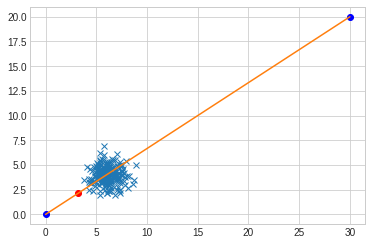

In [59]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
x, y = np.random.multivariate_normal(mean=[generated_x[0], generated_y[0]], cov=[[1 ,0], [0, 1]], size=200).T
plt.plot(x, y, 'x')
plt.plot(initial_x, initial_y, '-');